<a href="https://colab.research.google.com/github/Ibrahim-Alkhalil/hello-world/blob/master/Introduction_to_Pandas_and_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import random
import numpy as np

In [0]:
import pandas as pd

In [0]:
from google.colab import files
uploaded = files.upload()

Saving tempm.csv to tempm.csv


In [0]:
# read data from file
# Aarhus, Denmark (Open Data Aarhus)
df = pd.read_csv('tempm.csv', header=None)
df.head(5)

,0,1
0,2014-09-26T03:50:00,14.0
1,2014-08-10T05:00:00,14.0
2,2014-08-21T22:50:00,12.0
3,2014-08-17T13:20:00,16.0
4,2014-08-06T01:20:00,14.0


In [0]:
import matplotlib
%matplotlib inline

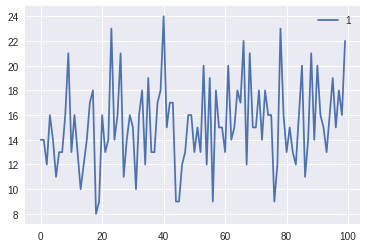

In [0]:
df[:100].plot()

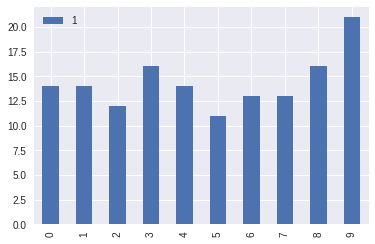

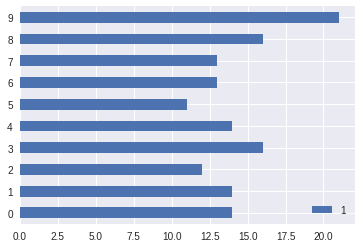

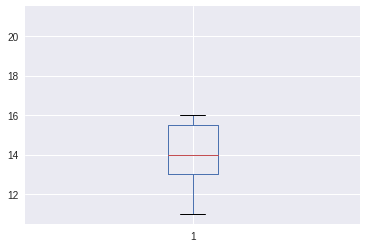

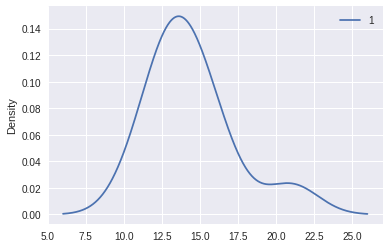

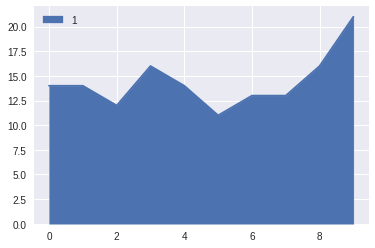

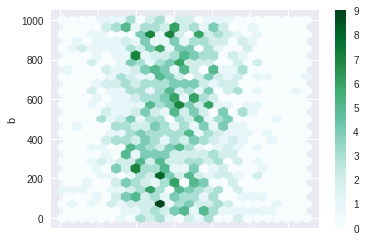

In [0]:
df[:10].plot(kind='bar')
df[:10].plot(kind='barh')
df[:10].plot(kind='box')
df[:10].plot(kind='kde')
df[:10].plot(kind='area')
dfh = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
dfh['b'] = dfh['b'] + np.arange(1000)
dfh.plot.hexbin(x='a', y='b', gridsize=25)

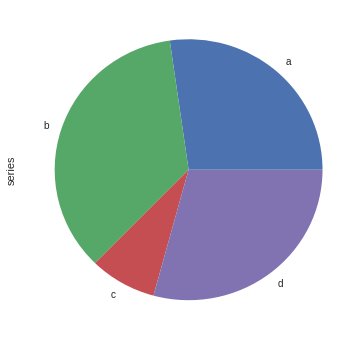

In [0]:
series = pd.Series(3 * np.random.rand(4), index=['a', 'b', 'c', 'd'], name='series')
series.plot(kind='pie', figsize=(6, 6))

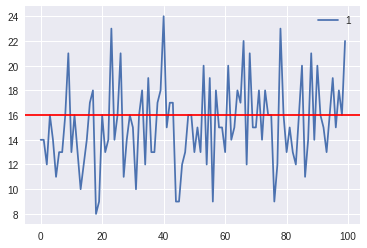

In [0]:
ax = df[:100].plot()
ax.axhline(16, color='r', linestyle='-')

In [0]:
n = 5

In [0]:
series = pd.Series(np.random.rand(n))
series

0    0.156972
1    0.334472
2    0.163386
3    0.034373
4    0.816824
dtype: float64

In [0]:
series = pd.Series(np.random.randint(1, 5, n))
series

0    2
1    2
2    2
3    2
4    1
dtype: int64

In [0]:
series = pd.Series(np.random.randint(1, 5, n), dtype=np.float64)
series

0    4.0
1    3.0
2    3.0
3    1.0
4    4.0
dtype: float64

In [0]:
series = pd.Series(np.random.randint(1, 5, n), dtype=np.float64, index=[n*x for x in range(n)])
series

0     4.0
5     3.0
10    4.0
15    2.0
20    1.0
dtype: float64

In [0]:
series = pd.Series(np.random.randint(1, 100, n), dtype=np.float64, index=list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')[:n])
series

A    24.0
B    41.0
C    80.0
D    64.0
E    59.0
dtype: float64

In [0]:
series['A']

24.0

In [0]:
series[0]

24.0

In [0]:
series[['A', 'D']]

A    24.0
D    64.0
dtype: float64

In [0]:
series[1:3]

B    41.0
C    80.0
dtype: float64

In [0]:
series[[1, 3]]

B    41.0
D    64.0
dtype: float64

In [0]:
series[lambda x: x%2 == 0]

A    24.0
C    80.0
D    64.0
dtype: float64

In [0]:
series.sample(2)

B    41.0
A    24.0
dtype: float64

In [0]:
series.name = "some data"
series

A    24.0
B    41.0
C    80.0
D    64.0
E    59.0
Name: some data, dtype: float64

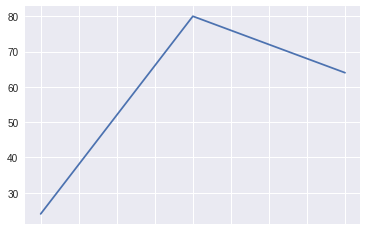

In [0]:
ax = series.loc[['A', 'C', 'D']].plot()

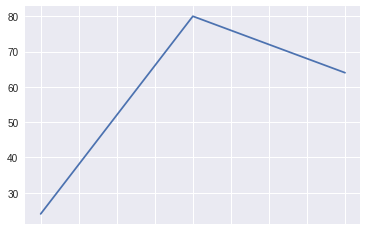

In [0]:
ax = series.iloc[[0, 2, 3]].plot()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


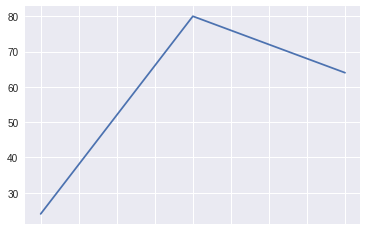

In [0]:
ax = series.ix[['A', 'C', 'D']].plot()

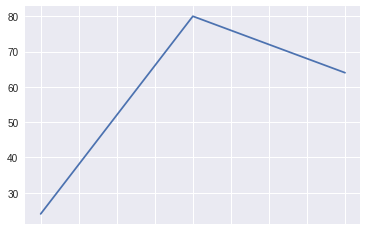

In [0]:
ax = series.ix[[0, 2, 3]].plot()

In [0]:
# loc works on labels in the index.
# iloc works on the positions in the index (so it only takes integers).
# ix usually tries to behave like loc but falls back to behaving like iloc if the label is not in the index.

In [0]:
df.columns = ['timestamp', 'temperature']
df.head(3)

,timestamp,temperature
0,2014-09-26T03:50:00,14.0
1,2014-08-10T05:00:00,14.0
2,2014-08-21T22:50:00,12.0


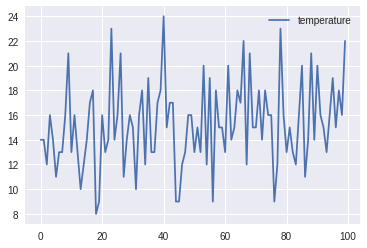

In [0]:
ax = df[:100].plot()

In [0]:
def to_fahrenheit(celsius):
    return (celsius * 9./5.) + 32.

In [0]:
df['temperature'].map(to_fahrenheit)[:5]

0    57.2
1    57.2
2    53.6
3    60.8
4    57.2
Name: temperature, dtype: float64

In [0]:
df['temperature F'] = df['temperature'].map(to_fahrenheit)
df.head(5)

,timestamp,temperature,temperature F
0,2014-09-26T03:50:00,14.0,57.2
1,2014-08-10T05:00:00,14.0,57.2
2,2014-08-21T22:50:00,12.0,53.6
3,2014-08-17T13:20:00,16.0,60.8
4,2014-08-06T01:20:00,14.0,57.2


In [0]:
df['temperature F'] = df['temperature'].apply(lambda x: (x * 9./5.) + 32.)
df.head()

,timestamp,temperature,temperature F
0,2014-09-26T03:50:00,14.0,57.2
1,2014-08-10T05:00:00,14.0,57.2
2,2014-08-21T22:50:00,12.0,53.6
3,2014-08-17T13:20:00,16.0,60.8
4,2014-08-06T01:20:00,14.0,57.2


In [0]:
df['ruleoftumb'] = df['temperature F'] / df['temperature']
df.head()

,timestamp,temperature,temperature F,ruleoftumb
0,2014-09-26T03:50:00,14.0,57.2,4.085714
1,2014-08-10T05:00:00,14.0,57.2,4.085714
2,2014-08-21T22:50:00,12.0,53.6,4.466667
3,2014-08-17T13:20:00,16.0,60.8,3.800000
4,2014-08-06T01:20:00,14.0,57.2,4.085714


In [0]:
df['ruleoftumb'].describe()

count    4354.000000
mean        3.988127
std         0.709916
min         2.985185
25%         3.577778
50%         3.933333
75%         4.261538
max        17.800000
Name: ruleoftumb, dtype: float64

In [0]:
df.rename(columns={'ruleoftumb': 'bad_rule'}, inplace=True)
df.head()

,timestamp,temperature,temperature F,bad_rule
0,2014-09-26T03:50:00,14.0,57.2,4.085714
1,2014-08-10T05:00:00,14.0,57.2,4.085714
2,2014-08-21T22:50:00,12.0,53.6,4.466667
3,2014-08-17T13:20:00,16.0,60.8,3.800000
4,2014-08-06T01:20:00,14.0,57.2,4.085714


In [0]:
df.drop('bad_rule', axis=1, inplace=True)
df.head()

,timestamp,temperature,temperature F
0,2014-09-26T03:50:00,14.0,57.2
1,2014-08-10T05:00:00,14.0,57.2
2,2014-08-21T22:50:00,12.0,53.6
3,2014-08-17T13:20:00,16.0,60.8
4,2014-08-06T01:20:00,14.0,57.2


In [0]:
df.groupby('temperature').count()

,timestamp,temperature F,deviation
temperature,,,
2.0,1,1,1
3.0,8,8,8
4.0,1,1,1
5.0,6,6,6
6.0,7,7,7
7.0,25,25,25
8.0,29,29,29
9.0,69,69,69
10.0,143,143,143


In [0]:
df['deviation'] = df['temperature'] - df['temperature'].mean()
df.head()

,timestamp,temperature,temperature F,deviation
0,2014-09-26T03:50:00,14.0,57.2,-1.590951
1,2014-08-10T05:00:00,14.0,57.2,-1.590951
2,2014-08-21T22:50:00,12.0,53.6,-3.590951
3,2014-08-17T13:20:00,16.0,60.8,0.409049
4,2014-08-06T01:20:00,14.0,57.2,-1.590951


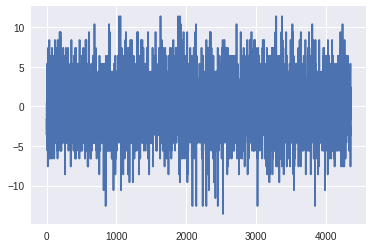

In [0]:
df['deviation'].plot()

In [0]:
# create TimeSeries Index
df.index = pd.to_datetime(df['timestamp'])

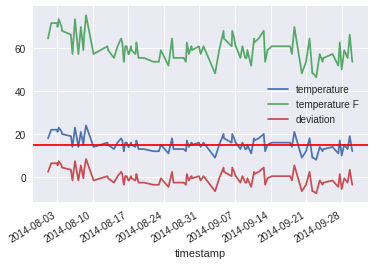

In [0]:
ax = df[:100].plot()
ax.axhline(df[:100]['temperature'].median(), color='r', linestyle='-')

In [0]:
df.head()

,timestamp,temperature,temperature F,deviation
timestamp,,,,
2014-09-26 03:50:00,2014-09-26T03:50:00,14.0,57.2,-1.590951
2014-08-10 05:00:00,2014-08-10T05:00:00,14.0,57.2,-1.590951
2014-08-21 22:50:00,2014-08-21T22:50:00,12.0,53.6,-3.590951
2014-08-17 13:20:00,2014-08-17T13:20:00,16.0,60.8,0.409049
2014-08-06 01:20:00,2014-08-06T01:20:00,14.0,57.2,-1.590951


In [0]:
df.index.view

<bound method Index.view of DatetimeIndex(['2014-09-26 03:50:00', '2014-08-10 05:00:00',
               '2014-08-21 22:50:00', '2014-08-17 13:20:00',
               '2014-08-06 01:20:00', '2014-09-27 06:50:00',
               '2014-08-25 21:50:00', '2014-08-14 05:20:00',
               '2014-09-14 05:20:00', '2014-08-03 02:50:00',
               ...
               '2014-08-22 10:00:00', '2014-09-10 16:20:00',
               '2014-08-14 15:50:00', '2014-09-05 04:00:00',
               '2014-09-29 02:50:00', '2014-08-21 01:50:00',
               '2014-09-13 10:00:00', '2014-08-16 23:20:00',
               '2014-09-28 10:20:00', '2014-09-25 18:20:00'],
              dtype='datetime64[ns]', name='timestamp', length=4357, freq=None)>

In [0]:
df.groupby(df.index.date).count()

,timestamp,temperature,temperature F,deviation
2014-08-01,72,72,72,72
2014-08-02,72,72,72,72
2014-08-03,70,70,70,70
2014-08-04,72,72,72,72
2014-08-05,68,68,68,68
2014-08-06,72,72,72,72
2014-08-07,72,72,72,72
2014-08-08,72,72,72,72
2014-08-09,72,72,72,72
2014-08-10,72,72,72,72


In [0]:
type(df)

pandas.core.frame.DataFrame

In [0]:
type(df['timestamp'])

pandas.core.series.Series

In [0]:
type(df['temperature'])

pandas.core.series.Series

In [0]:
df['timestamp'].describe()
# get info, text = object

count                    4357
unique                   4357
top       2014-08-15T20:50:00
freq                        1
Name: timestamp, dtype: object

In [0]:
df['temperature'].describe()
# get basic stats

count    4354.000000
mean       15.590951
std         3.596220
min         2.000000
25%        13.000000
50%        15.000000
75%        18.000000
max        27.000000
Name: temperature, dtype: float64

In [0]:
df.describe(percentiles=[.1, .5, .6, .7])
# get basic stats

,temperature,temperature F,deviation
count,4354.000000,4354.000000,4.354000e+03
mean,15.590951,60.063712,5.418011e-16
std,3.596220,6.473197,3.596220e+00
min,2.000000,35.600000,-1.359095e+01
10%,11.000000,51.800000,-4.590951e+00
50%,15.000000,59.000000,-5.909508e-01
60%,16.000000,60.800000,4.090492e-01
70%,17.000000,62.600000,1.409049e+00
max,27.000000,80.600000,1.140905e+01


In [0]:
df.describe(percentiles=[.1, .5, .6, .7], include=[np.float64])
# get basic stats

,temperature,temperature F,deviation
count,4354.000000,4354.000000,4.354000e+03
mean,15.590951,60.063712,5.418011e-16
std,3.596220,6.473197,3.596220e+00
min,2.000000,35.600000,-1.359095e+01
10%,11.000000,51.800000,-4.590951e+00
50%,15.000000,59.000000,-5.909508e-01
60%,16.000000,60.800000,4.090492e-01
70%,17.000000,62.600000,1.409049e+00
max,27.000000,80.600000,1.140905e+01


In [0]:
df.dropna()['temperature'].describe()
# easy clean-up of data

count    4354.000000
mean       15.590951
std         3.596220
min         2.000000
25%        13.000000
50%        15.000000
75%        18.000000
max        27.000000
Name: temperature, dtype: float64

In [0]:
df['temperature'].describe()
# caveat: inplace must be set explicitly

count    4354.000000
mean       15.590951
std         3.596220
min         2.000000
25%        13.000000
50%        15.000000
75%        18.000000
max        27.000000
Name: temperature, dtype: float64

In [0]:
df[df['temperature'].isnull()]

,timestamp,temperature,temperature F,deviation
timestamp,,,,
2014-09-09 03:50:00,2014-09-09T03:50:00,NaN,NaN,NaN
2014-09-15 10:00:00,2014-09-15T10:00:00,NaN,NaN,NaN
2014-08-27 05:00:00,2014-08-27T05:00:00,NaN,NaN,NaN


In [0]:
df['temperature'].isnull()[2350:2357]

timestamp
2014-08-24 10:20:00    False
2014-09-14 02:20:00    False
2014-09-29 05:00:00    False
2014-08-10 12:00:00    False
2014-08-27 05:00:00     True
2014-09-28 12:50:00    False
2014-08-05 01:00:00    False
Name: temperature, dtype: bool

In [0]:
df['temperature'].isnull().any()

True

In [0]:
df.dropna()
df['temperature'].isnull().any()

True

In [0]:
df.dropna(inplace=True)
df['temperature'].isnull().any()

False

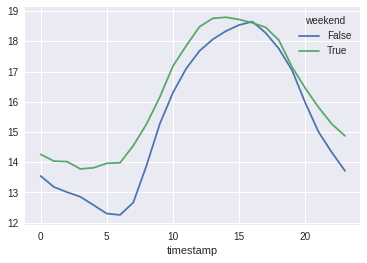

In [0]:
df['weekday'] = df.index.weekday
df['weekend'] = df['weekday'].isin({5, 6})
df.groupby(['weekend', df.index.hour])['temperature'].mean().unstack(level=0).plot()

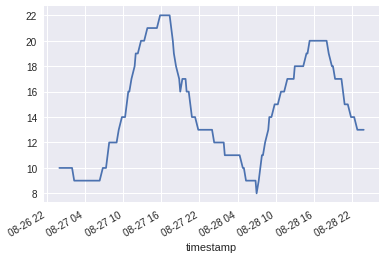

In [0]:
# selecting ranges
df["2014-08-27":"2014-08-28"]['temperature'].plot()

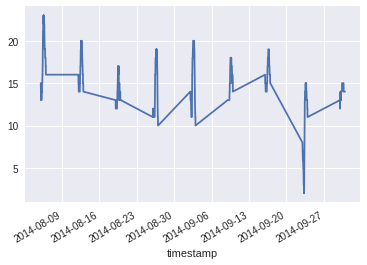

In [0]:
df[df.index.weekday == True]['temperature'].plot()

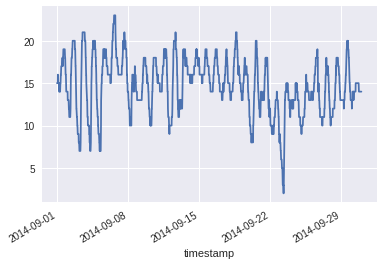

In [0]:
df['2014-09']['temperature'].plot()

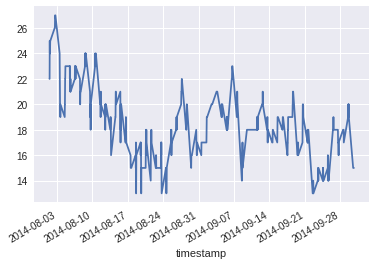

In [0]:
df[(df.index.hour > 12) & (df.index.hour <=16)]['temperature'].plot()

In [0]:
df.resample('D').max().head()

,timestamp,temperature,temperature F,deviation,weekday,weekend
timestamp,,,,,,
2014-08-01,2014-08-01T23:50:00,25.0,77.0,9.409049,4,False
2014-08-02,2014-08-02T23:50:00,27.0,80.6,11.409049,5,True
2014-08-03,2014-08-03T23:50:00,25.0,77.0,9.409049,6,True
2014-08-04,2014-08-04T23:50:00,24.0,75.2,8.409049,0,False
2014-08-05,2014-08-05T23:50:00,23.0,73.4,7.409049,1,False


In [0]:
df.resample('M').mean().head()

,temperature,temperature F,deviation,weekday,weekend
timestamp,,,,,
2014-08-31,16.436652,61.585973,0.845701,3.201810,0.324434
2014-09-30,14.719216,58.494590,-0.871734,2.841884,0.267724


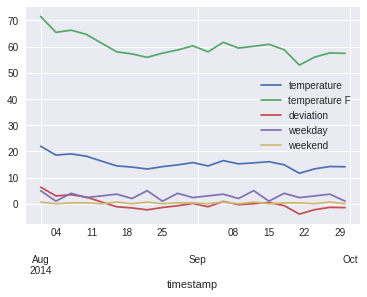

In [0]:
df.resample('3D').mean().plot()

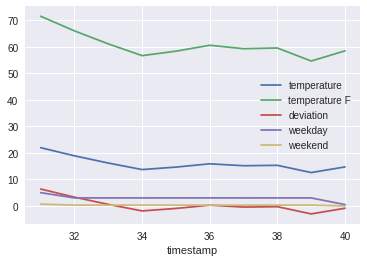

In [0]:
df.groupby(df.index.week).mean().plot()

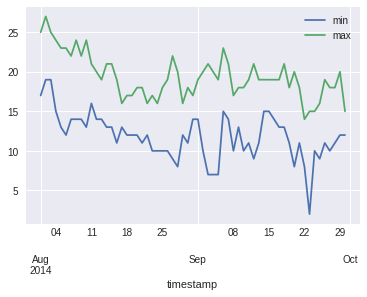

In [0]:
df['temperature'].resample('D').agg(['min', 'max']).plot()

In [0]:
new_index = df.index.shift(2, freq="H")
df.set_index(new_index, inplace=True)

In [0]:
df['temperature'][:2]

timestamp
2014-09-26 05:50:00    14.0
2014-08-10 07:00:00    14.0
Name: temperature, dtype: float64

In [0]:
import random
index = pd.date_range('1/1/2016', periods=1200, freq='S')
series = pd.Series([random.randint(0,100) for p in range(1200)], index=index)
series

2016-01-01 00:00:00     7
2016-01-01 00:00:01    58
2016-01-01 00:00:02     8
2016-01-01 00:00:03    11
2016-01-01 00:00:04    14
2016-01-01 00:00:05    90
2016-01-01 00:00:06    65
2016-01-01 00:00:07    16
2016-01-01 00:00:08    85
2016-01-01 00:00:09     5
2016-01-01 00:00:10    12
2016-01-01 00:00:11     2
2016-01-01 00:00:12     3
2016-01-01 00:00:13    36
2016-01-01 00:00:14    89
2016-01-01 00:00:15    73
2016-01-01 00:00:16    53
2016-01-01 00:00:17     6
2016-01-01 00:00:18    27
2016-01-01 00:00:19    73
2016-01-01 00:00:20    75
2016-01-01 00:00:21    51
2016-01-01 00:00:22    68
2016-01-01 00:00:23    90
2016-01-01 00:00:24    61
2016-01-01 00:00:25    71
2016-01-01 00:00:26    43
2016-01-01 00:00:27    16
2016-01-01 00:00:28    19
2016-01-01 00:00:29    25
                       ..
2016-01-01 00:19:30    15
2016-01-01 00:19:31    78
2016-01-01 00:19:32    55
2016-01-01 00:19:33    61
2016-01-01 00:19:34    61
2016-01-01 00:19:35    59
2016-01-01 00:19:36    77
2016-01-01 0

In [0]:
resampled = series.resample('5T', label='right', closed='right').mean()
resampled

2016-01-01 00:00:00     7.000000
2016-01-01 00:05:00    51.046667
2016-01-01 00:10:00    50.730000
2016-01-01 00:15:00    51.260000
2016-01-01 00:20:00    50.290970
Freq: 5T, dtype: float64

In [0]:
upsampled = resampled.resample('90S').mean()[:6]
upsampled

2016-01-01 00:00:00     7.000000
2016-01-01 00:01:30          NaN
2016-01-01 00:03:00          NaN
2016-01-01 00:04:30    51.046667
2016-01-01 00:06:00          NaN
2016-01-01 00:07:30          NaN
Freq: 90S, dtype: float64

In [0]:
upsampled = resampled.resample('90S').pad()[:6]
upsampled

2016-01-01 00:00:00     7.000000
2016-01-01 00:01:30     7.000000
2016-01-01 00:03:00     7.000000
2016-01-01 00:04:30     7.000000
2016-01-01 00:06:00    51.046667
2016-01-01 00:07:30    51.046667
Freq: 90S, dtype: float64

In [0]:
upsampled = resampled.resample('90S').bfill()[:6]
upsampled

2016-01-01 00:00:00     7.000000
2016-01-01 00:01:30    51.046667
2016-01-01 00:03:00    51.046667
2016-01-01 00:04:30    51.046667
2016-01-01 00:06:00    50.730000
2016-01-01 00:07:30    50.730000
Freq: 90S, dtype: float64

In [0]:
def myresmapler(*args, **kwargs):
    return random.randint(1, 100)

upsampled = resampled.resample('90S').apply(myresmapler)
upsampled

2016-01-01 00:00:00    88.0
2016-01-01 00:01:30    23.0
2016-01-01 00:03:00    36.0
2016-01-01 00:04:30    63.0
2016-01-01 00:06:00    12.0
2016-01-01 00:07:30    48.0
2016-01-01 00:09:00    25.0
2016-01-01 00:10:30    21.0
2016-01-01 00:12:00    12.0
2016-01-01 00:13:30    40.0
2016-01-01 00:15:00    50.0
2016-01-01 00:16:30    69.0
2016-01-01 00:18:00    71.0
2016-01-01 00:19:30    65.0
Freq: 90S, dtype: float64